In [42]:
#hello!
#at first import necessary librares

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1

Well, firsly I'll show the code, at the end - summary.

In [43]:
#loading data
#I won't use 'store' and 'created_at' columns, cause of their useless

df1 = pd.read_csv('df_1_test.csv', sep = ',', usecols = [2,3,4,5,6,7,8])
df2 = pd.read_csv('df_2_test.csv', sep = ',', usecols = [2,3,4,5,6,7,8])

In [44]:
#cheking the size of dataframes
#df2 > df1 in ~3 times

print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378844 entries, 0 to 378843
Data columns (total 7 columns):
country                 378844 non-null object
store_application_id    378844 non-null int64
date                    378844 non-null object
top_free                368220 non-null float64
top_grossing            268783 non-null float64
revenue                 231605 non-null float64
downloads               364060 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 20.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909695 entries, 0 to 909694
Data columns (total 7 columns):
country                 903802 non-null object
store_application_id    909695 non-null int64
date                    909695 non-null object
top_free                203982 non-null float64
top_grossing            145412 non-null float64
revenue                 132979 non-null float64
downloads               908907 non-null float64
dtypes: float64(4), int64(1), object(2)
memory u

In [45]:
#creating copies of dataframes for ours files WITHOUT NaN rows

dff1 = df1.copy()
dff1 = dff1.dropna()
dff2 = df2.copy()
dff2 = dff2.dropna()

#then find % full-filled rows in both dataframes 
#only ~8% for second one file

print(dff1.shape[0] / df1.shape[0] * 100)
print(dff2.shape[0] / df2.shape[0] * 100)

58.66715587418568
7.967065884719604


In [46]:
#at the end count % of NaN VALUES in dataframes
#again df2 > df1 for NaN information

print(df1.isna().sum().sum() / df1.size * 100)
print(df2.isna().sum().sum() / df2.size * 100)

10.660550818505016
35.38694680242122


Summary and answers:

df1 - training data, contains collected data

df2 - data of algorithm prediction

Reasons:

- view of revenue values in df2 looks like the answer of algorithm (too much numbers after dot)
- 'created_at' column is filled in df1, it shows time of collection
- 'downloads' column is totally full in df2 like an answer of algorithm, it contains a lot of '1' values, where NN didn't know, what to put (less info)
- based on previous info from code, I can mark big problems with data if df2 - prediction dataset, and really good filled df1, like in thaining set
- also I have a hypothesis of several 'not shown' columns for training NN

# Task 2

In [47]:
#making a function for counting applications in column 'store_app_id'

def counting_apps(dataframe):
    data = dataframe['store_application_id'].tolist()
    setup = set(data)
    duplicate = []
    for i in setup:
        if data.count(i) > 0:
            duplicate.append(i) 
    return duplicate

In [48]:
#the same with set of countries

def counting_country(dataframe):
    data = dataframe['country'].tolist()
    setup = set(data)
    duplicate = []
    for i in setup:
        if data.count(i) > 0:
            duplicate.append(i) 
    return duplicate

In [49]:
#checking how much applications we have
#in this dataframe - 5

counting_country(df1)
counting_apps(df1)

[1, 2, 3, 4, 5]

In [50]:
#creating new dataframe with necessary country and app info

def country_app_dataframe(dataframe, abb, n):
    if abb in counting_country(dataframe) and n in counting_apps(dataframe):
        #creating new dataframe with columns fron main one
        data = pd.DataFrame(columns = dataframe.columns.tolist())
        new_line_data = 0
        #filling this new dataframe
        for index, row in dataframe.iterrows():
            if row['country'] == abb and row['store_application_id'] == n:
                data.loc[new_line_data] = dataframe.iloc[index]
                new_line_data += 1   
        #delete duplicates by counting mean value for duplicates (revenue, downloads)
        data = data.drop_duplicates(['store_application_id', 'date', 'country'])
        #change index to date list
        data.index = data['date'] 
        #sorting to date
        data = data.sort_index()
        return data
    else:
        return 'no info'

In [51]:
#function for plotting 

def plotting(dataframe, abb, n):
    #cheking unique dates
    unique = country_app_dataframe(dataframe, abb, n).index.nunique()
    #creating plots data
    tops = country_app_dataframe(dataframe, abb, n).loc[:, ['top_free','top_grossing']]
    rev_down = country_app_dataframe(dataframe, abb, n).loc[:, ['revenue','downloads']]
    #set 1st plot parameters
    plt.figure(figsize=(16, 10))
    plt.plot(tops)
    plt.xlabel('Date', size = 14)
    plt.ylabel('Raiting position', size = 14)
    plt.title(f'Tops graph in {abb} region for {n} application', size = 20)
    plt.xticks(np.arange(0, unique, unique / 20 - 1), rotation='vertical')
    plt.legend(['top_free','top_grossing'], loc = 9, prop = {'size': 12})
    plt.show()
    plt.clf()
    #set 2nd plot parameters
    plt.figure(figsize=(16, 10))
    plt.plot(rev_down)
    plt.xlabel('Date', size = 14)
    plt.ylabel('Loads and money', size = 14)
    plt.title(f'Downloads and revenue relation graph in {abb} region for {n} application', size = 20)
    plt.xticks(np.arange(0, unique, unique / 20 - 1), rotation='vertical')
    plt.legend(['revenue','downloads'], loc = 9, prop = {'size': 12})
    plt.show()
    plt.clf()

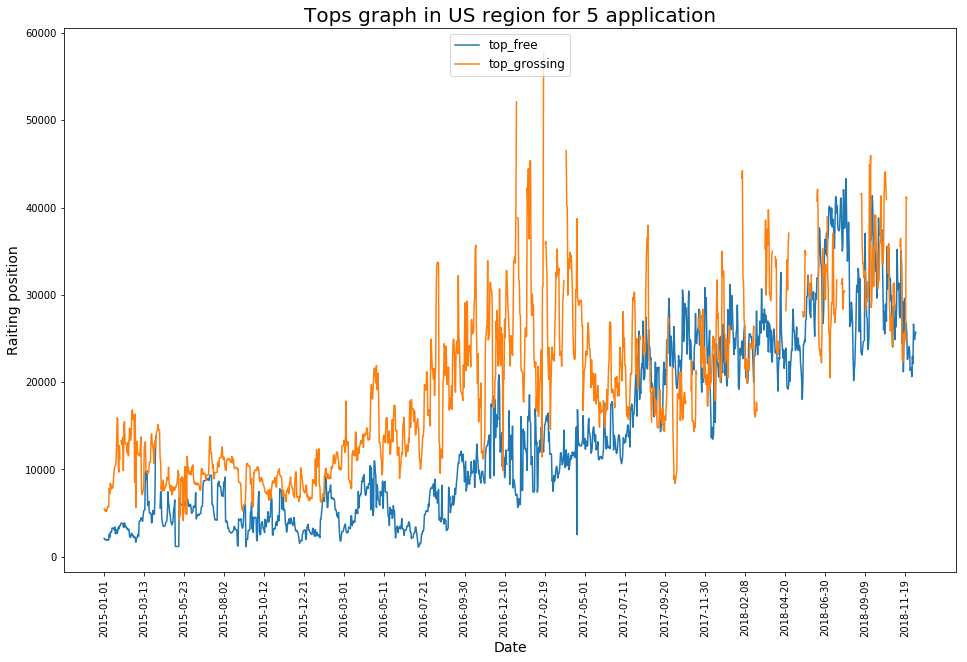

<Figure size 432x288 with 0 Axes>

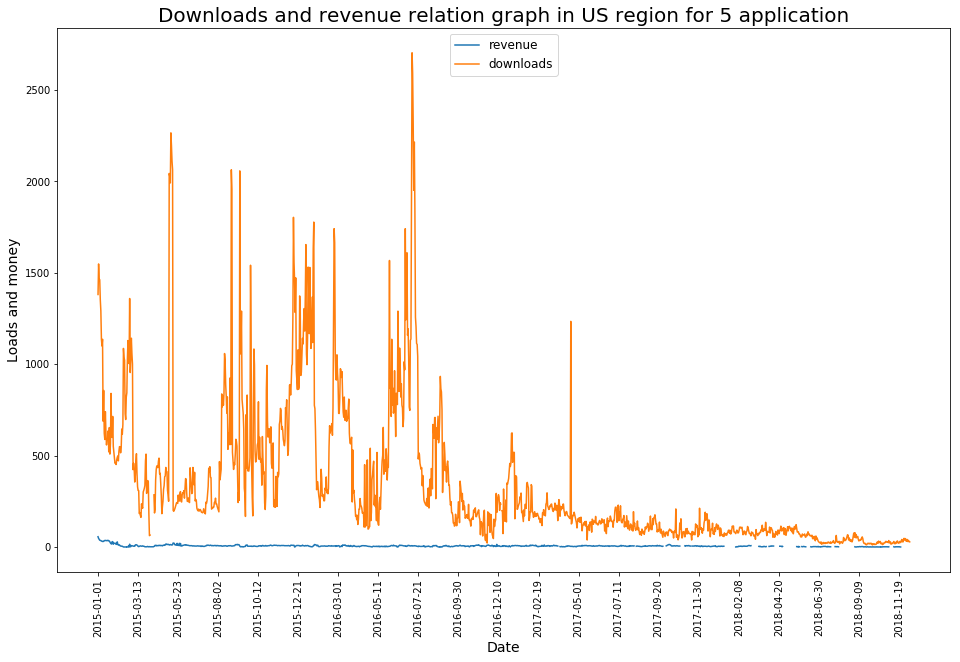

<Figure size 432x288 with 0 Axes>

In [52]:
#making plot for 5th - most problematic application in my opinion

plotting(df1, 'US', 5)

Summary and answers:

I chose 5th applicaton in US region because:
- large differences in tops (top_free, top_grossing) values in a short time
- no correlation between revenue with downloads
- many emissions in all parameters except revenue

# Task 3

In [53]:
#it's necessary to load data once again
#and again I delete 'store' and 'created_at' columns, but in different way

df1 = pd.read_csv('df_1_test.csv', sep = ',')
df2 = pd.read_csv('df_2_test.csv', sep = ',')
df1.drop(df1.columns[[0, 1, -1]], axis = 1, inplace = True)
df2.drop(df2.columns[[0, 1, -1]], axis = 1, inplace = True)

In [54]:
#then I decide to delete duplicates

df1 = df1.drop_duplicates(['store_application_id', 'date', 'country'])
df2 = df2.drop_duplicates(['store_application_id', 'date', 'country'])

#and sorting by 3 columns

df1 = df1.sort_values(['store_application_id', 'date', 'country'], ascending = [True, True, True])
df2 = df2.sort_values(['store_application_id', 'date', 'country'], ascending = [True, True, True])

In [55]:
#in that place I want to say, that I tried to iterate both dataframes 
#firstly by iterrows command - very, very long time working
#secondly by itertuples - better, but also slow
#at least by merge command - best option

df_main = pd.merge(df1, df2, on = ['store_application_id', 'date', 'country'], how = 'inner')

In [56]:
#for analize I'm using mean squared error and mean absolute error - for large deviation
#find mse and mae coefficients for i application_id

apps_df = counting_apps(df_main)

def mse_mae_calc(app):
    count_revenue = 0.
    mse_revenue = 0.
    mae_revenue = 0.
    x_revenue = 0.
    
    count_downloads = 0.
    mse_downloads = 0.
    mae_downloads = 0.
    x_downloads = 0.
    
    for i_row in df_main.itertuples():
        if i_row[2] in apps_df and i_row[2] == app:
            if pd.notna(i_row[6]) and pd.notna(i_row[7]) and pd.notna(i_row[10]) and pd.notna(i_row[11]):
                mse_revenue += (i_row[6] - i_row[10])**2.
                mae_revenue += (i_row[6] - i_row[10])  
                x_revenue += i_row[6]
                count_revenue += 1.
                mse_downloads += (i_row[7] - i_row[11])**2.
                mae_downloads += (i_row[7] - i_row[11])
                x_downloads += i_row[7]               
                count_downloads += 1.
                
            elif pd.notna(i_row[6]) and pd.notna(i_row[10]):
                mse_revenue += (i_row[6] - i_row[10])**2.
                mae_revenue += (i_row[6] - i_row[10])
                x_revenue += i_row[6]
                count_revenue += 1.
                
            elif pd.notna(i_row[7]) and pd.notna(i_row[11]):    
                mse_downloads += (i_row[7] - i_row[11])**2.
                mae_downloads += (i_row[7] - i_row[11])
                x_downloads += i_row[7]
                count_downloads += 1.
    
    if count_revenue == 0. or count_downloads == 0:
        return 'division by zero'
    else:
        mse_r = np.sqrt(mse_revenue / count_revenue)
        mae_r = mae_revenue / count_revenue
        av_r = x_revenue / count_revenue
        mse_d = np.sqrt(mse_downloads / count_downloads)
        mae_d = mae_downloads / count_downloads
        av_d = x_downloads / count_downloads
        
        df = pd.DataFrame( {"revenue" : [mse_r, mse_r / av_r * 100., mae_r, mae_r / av_r * 100., av_r,  count_revenue], "downloads" : [mse_d, mse_d / av_d * 100., mae_d, mae_d / av_d * 100., av_d, count_downloads]}, index = ['MSE', '% MSE', 'MAE', '% MAE', 'average_value', 'counts']) 
        return df

In [57]:
#searching for most problematic application
#'% MSE' and '% MAE' - related MSE and MAE values
#I chose 5th application

for i in apps_df:
    print(f'{i} application')
    print(mse_mae_calc(i))
    print('-----------------------------------------')

1 application
                    revenue     downloads
MSE               45.666002    231.808938
% MSE            115.262242     34.669145
MAE                0.011853      5.611193
% MAE              0.029916      0.839205
average_value     39.619221    668.631830
counts         32142.000000  55822.000000
-----------------------------------------
2 application
                   revenue     downloads
MSE              28.830367    105.485310
% MSE           133.472609     56.287165
MAE               3.167420      7.010336
% MAE            14.663838      3.740729
average_value    21.600212    187.405621
counts         6601.000000  39956.000000
-----------------------------------------
3 application
                    revenue     downloads
MSE               92.932076    522.894733
% MSE             84.736731    166.236343
MAE                3.027045      1.427774
% MAE              2.760101      0.453912
average_value    109.671538    314.548987
counts         43795.000000  55555.000000

In [58]:
#this is the similar MSE MAE calculator, but only for country in chosen application
#and only for downloads values

country_df = counting_country(df_main)

def mse_mae_country_calc(abb, app):
    
    count_downloads = 0.
    mse_downloads = 0.
    mae_downloads = 0.
    x_downloads = 0.
    
    for i_row in df_main.itertuples():
        if i_row[1] == abb and i_row[1] in country_df and i_row[2] == app:
            if pd.notna(i_row[7]) and pd.notna(i_row[11]):
                mse_downloads += (i_row[7] - i_row[11])**2.
                mae_downloads += (i_row[7] - i_row[11])
                x_downloads += i_row[7]               
                count_downloads += 1.
                
    if count_downloads == 0:
        return 'division by zero'
    else:
        mse_d = np.sqrt(mse_downloads / count_downloads)
        mae_d = mae_downloads / count_downloads
        av_d = x_downloads / count_downloads      
        df = pd.DataFrame( {"downloads" : [mse_d, mse_d / av_d * 100., mae_d, mae_d / av_d * 100., av_d, count_downloads]}, index = ['MSE', '% MSE', 'MAE', '% MAE', 'average_value', 'counts']) 
        
        return df

In [59]:
#as I said I chose 5th application cause of big values of '% MSE' and '% MAE'
#and now searching most problematic country
#it is SE (means SWEDEN)

application = 5
top = 0.
top_df = pd.DataFrame()
country = ''
for i in country_df:
    current = mse_mae_country_calc(i, application)['downloads'][1]
    if current > top:
        top = current
        top_df = mse_mae_country_calc(i, application)
        country = i
        
print(f'{application} application')
print(f'{country} country')
print(top_df)

5 application
SE country
                 downloads
MSE               7.220455
% MSE           163.414961
MAE              -3.185688
% MAE           -72.099221
average_value     4.418478
counts         1104.000000


In [60]:
#at least collect info for making the plot
#collect SE, 5 app data from main dataframe 

df_se_5 = country_app_dataframe(df_main, 'SE', 5)

#adding new column with error values of downloads for SE country in 5 application

df_se_5['error'] = np.abs((df_se_5['downloads_x'] - df_se_5['downloads_y']) / df_se_5['downloads_x'])

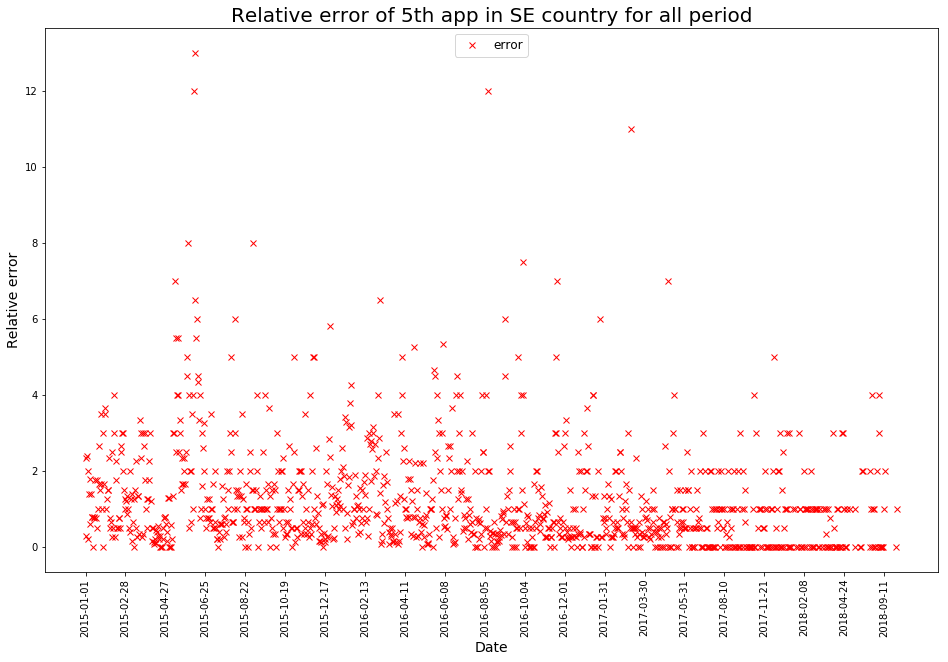

<Figure size 432x288 with 0 Axes>

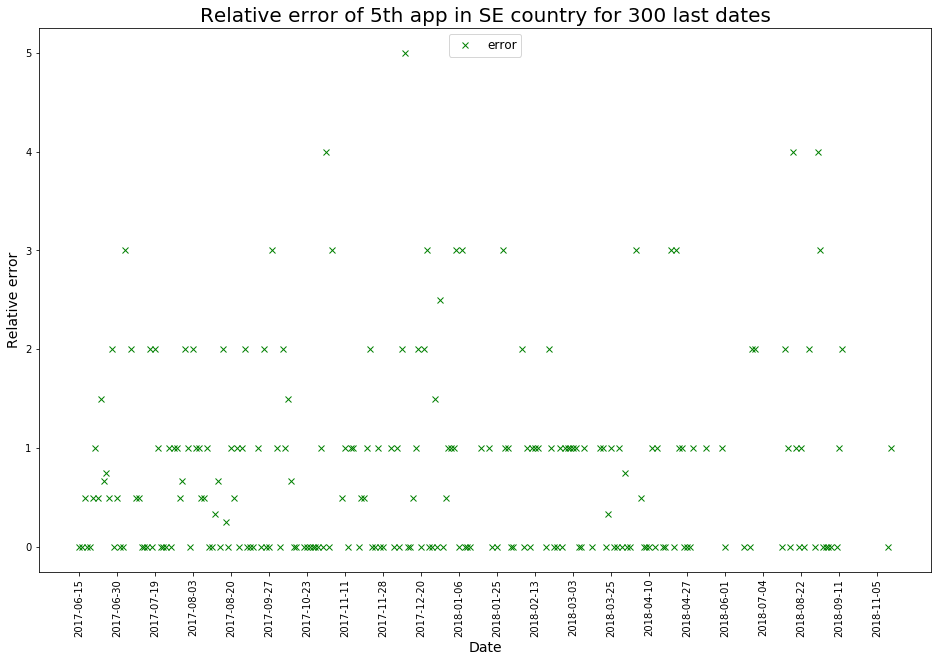

<Figure size 432x288 with 0 Axes>

In [61]:
#making 2 plots: for all time period, and last 1.5 year

plot_se_5 = df_se_5.loc[:, ['error']]
unique = df_se_5.index.nunique()

#set 1st plot parameters
plt.figure(figsize = (16, 10))
plt.plot(plot_se_5, marker = 'x', linestyle = '', color = 'red')
plt.xlabel('Date', size = 14)
plt.ylabel('Relative error', size = 14)
plt.title('Relative error of 5th app in SE country for all period', size = 20)
plt.xticks(np.arange(0, unique, unique / 20 - 1), rotation = 'vertical')
plt.legend(['error'], loc = 9, prop = {'size': 12})
plt.show()
plt.clf()

#let's see values of error for last period of time

n_last_values = 300

#set 2nd plot parameters
plt.figure(figsize = (16, 10))
plt.plot(plot_se_5.tail(n_last_values), marker = 'x', linestyle = '', color = 'green')
plt.xlabel('Date', size = 14)
plt.ylabel('Relative error', size = 14)
plt.title(f'Relative error of 5th app in SE country for {n_last_values} last dates', size = 20)
plt.xticks(np.arange(0, n_last_values, n_last_values / 20 - 1), rotation = 'vertical')
plt.legend(['error'], loc = 9, prop = {'size': 12})
plt.show()
plt.clf()

At the end as you can see, worst application - №5, and worst region for it - Sweden.

But at last period model worked better than before.

Thank you for such interesting task.

Andrey Shubin, 2018.